In [26]:
import datetime

import matplotlib
matplotlib.rcParams['font.family']='IPAGothic'
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import lightgbm as lgb
from sklearn import svm
import xgboost as xgb
import catboost
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn
import graphviz

In [2]:
def load_data(y):
    path = '../../data/std_data/'
    x_train_std = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).values
    x_test_std = pd.read_pickle(path +'test/{}_x.pkl'.format(str(y))).values
    y_train = pd.read_pickle(path +'train/{}_y.pkl'.format(str(y))).values
    y_test = pd.read_pickle(path +'test/{}_y.pkl'.format(str(y))).values
    features = pd.read_pickle(path +'train/{}_x.pkl'.format(str(y))).columns
    return x_train_std, x_test_std, y_train, y_test, features

In [24]:
def model_to_histogram(model, features, fig_title):
    importances = model.feature_importances_
    indices = np.argsort(importances)
    

    plt.figure(figsize=(20, 20))
    plt.barh(range(len(indices)), importances[indices], color='r', align='center', log=True)
    plt.yticks(range(len(indices)), features[indices])
    plt.show()
    
    now = datetime.datetime.now()
    plg.savefig("figures/{}_")

    """
    seaborn.distplot(
        importances[indices], bins=None, hist=True, kde=False, rug=True, fit=None, 
        hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color='r', 
        vertical=True, norm_hist=False, axlabel=features[indices], label=None, ax=None
    )
    """

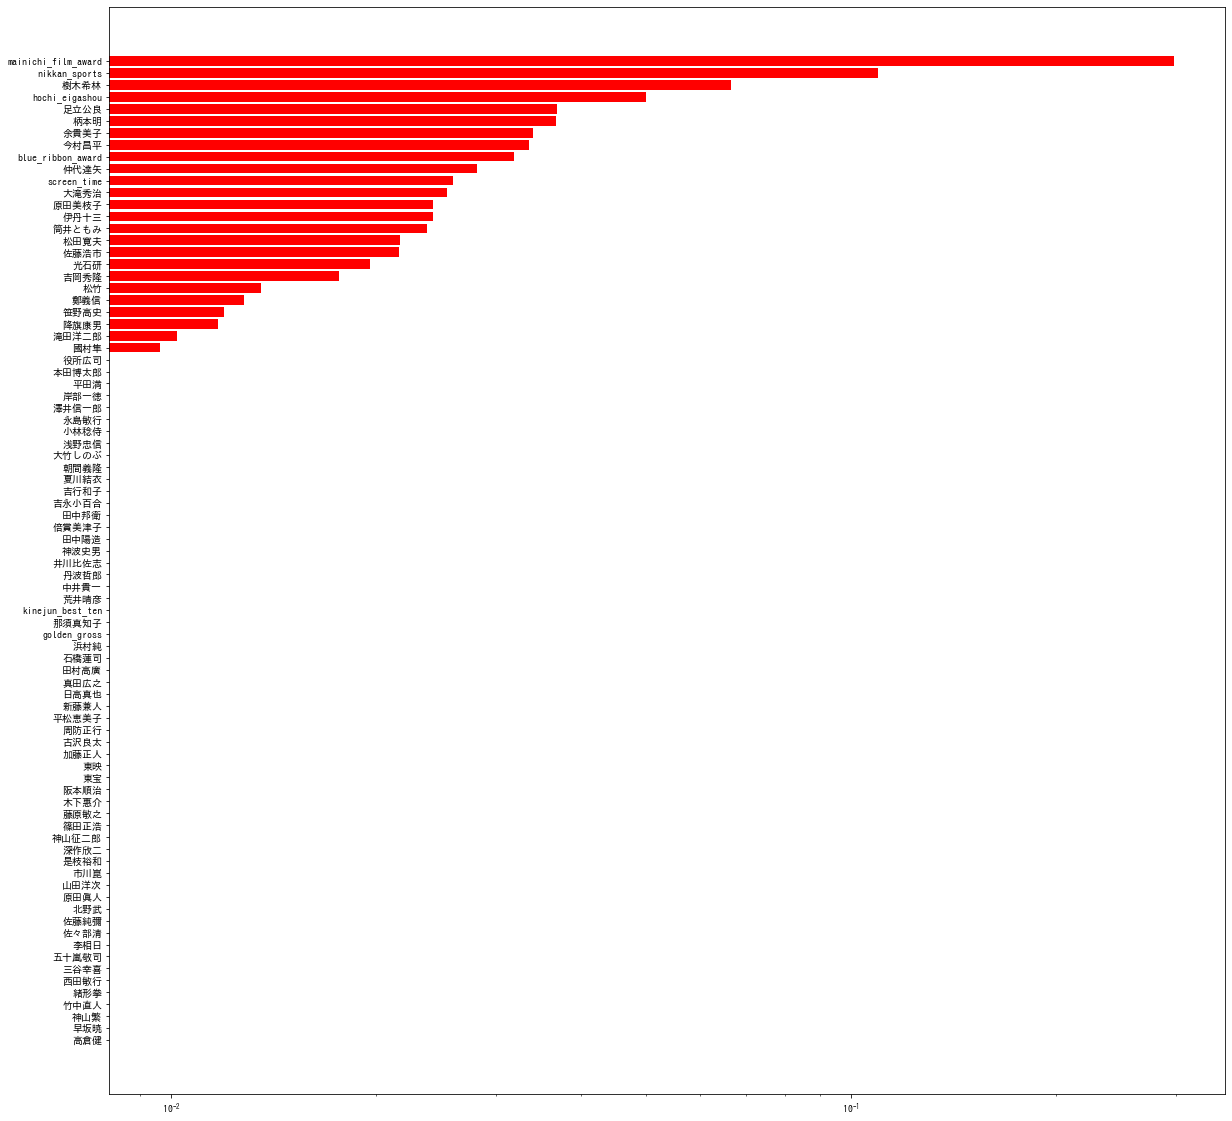

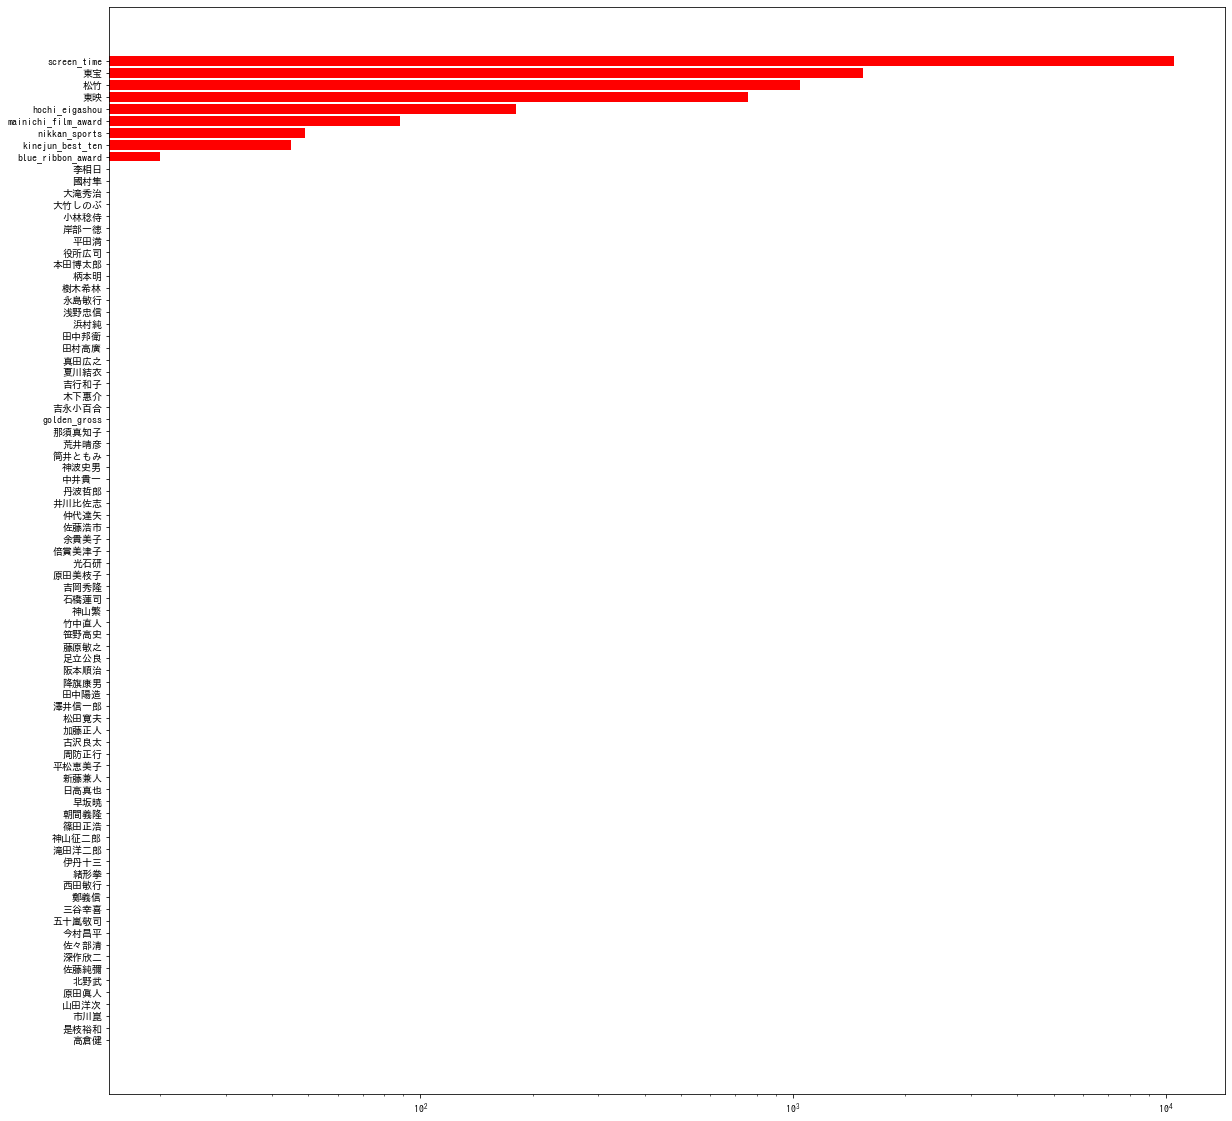

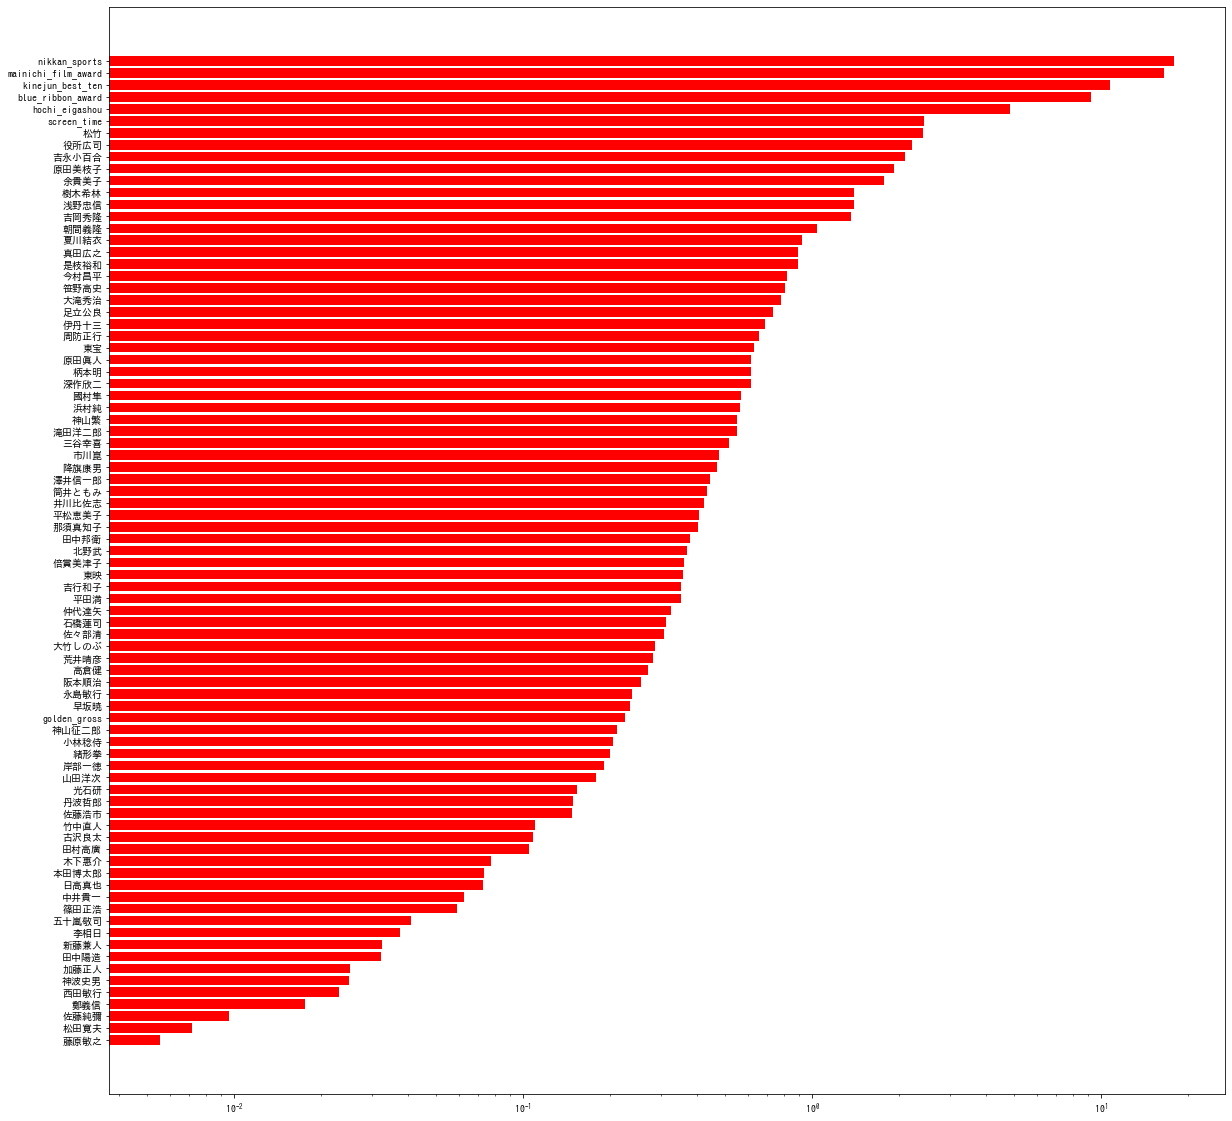

In [25]:
def main():
    year = 2018
    x_train_std, x_test_std, y_train, y_test, features = load_data(year)

    # xgb
    xgboost = xgb.XGBRegressor(
        silent= True, 
        max_depth=4,
        learning_rate=0.12765177534095626,
        n_estimators = 46,
        gamma=0.060805284848630535,
        reg_lambda=4.995675788308118,
        reg_alpha=2.1912254426545754,
        sub_sample=0.45297631180790854,
        scale_pos_weight=1.1672978934986058
    )
    xgboost.fit(x_train_std, y_train)
    model_to_histogram(xgboost, features)
        
    """
    xgb.plot_importance(
        xgboost,
        grid=True,
        importance_type="cover",
        max_num_features=None,
        title="XGBoost feature importance (cover)",
        show_values=False
    )
    xgb.plot_tree(
        xgboost, fmap='', num_trees=0, rankdir=None, ax=None
    )
    """
    # lightGBM
    lightgbm = lgb.LGBMRegressor(
        random_state=0,
        verbosity=-1,
        bagging_seed=0,
        boost_from_average='true',
        metric='auc',
        bagging_freq=4,
        min_data_in_leaf=21,
        max_depth=13,
        learning_rate=0.08731913651405197,
        n_estimators=3394,
        subsample=0.7054763057027115,
        num_leaves=438,
        reg_lambda=0.9377125325944119,  
    )
    lightgbm.fit(x_train_std, y_train)
    model_to_histogram(lightgbm, features)
    
    # catboost
    cat_params = {'iterations': 258,
     'depth': 2,
     'learning_rate': 0.019083573879517587,
     'random_strength': 84,
     'bagging_temperature': 0.3233702745357832, 
     'od_type': 'Iter', 
     'od_wait': 32
    }
    cat = catboost.CatBoostRegressor(**cat_params, logging_level='Silent')
    cat.fit(x_train_std, y_train)
    model_to_histogram(cat, features)
main()